In [22]:
import pandas as pd
import numpy as np
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import csv
import seaborn as sns
import os

In [2]:
languages = ["arabic","chinese","english","french","russian","spanish"]
metrics = ["editors","absolute-bytes","edited-page","edits","netbytediff","newpages"]

user_dataset = []
anon_dataset = []
for lan in languages:
    user_lan_dataset = []
    anon_lan_dataset = []
    for met in metrics:
        file_name = lan+"-"+met+".csv"

        data = pd.read_csv("./data/"+file_name)
        user_data = data["total.user"].to_list()
        anon_data = data["total.anonymous"].to_list()
        user_lan_dataset.append(user_data)
        anon_lan_dataset.append(anon_data)
    user_dataset.append(user_lan_dataset)
    anon_dataset.append(anon_lan_dataset)

In [43]:
for i in range(len(user_dataset)):
    lan = languages[i]
    # print(lan+"------------------------------------------")
    user_lan_dataset = user_dataset[i]
    anon_lan_dataset = anon_dataset[i]
    
    #number of editors
    user_editors = user_lan_dataset[0]
    anon_editors = anon_lan_dataset[0]
    pcc_user = []
    pp_user = []
    pcc_anon = []
    pp_anon = []

    for j in range(1, len(user_dataset)):
        metric = metrics[j]
        metric_user_values = user_lan_dataset[j]
        metric_anon_values = anon_lan_dataset[j]
        
        correlation_user, p_value_user = pearsonr(user_editors, metric_user_values)
        pcc_user.append(correlation_user)
        pp_user.append(p_value_user)

        correlation_anon, p_value_anon = pearsonr(anon_editors, metric_anon_values)
        pcc_anon.append(correlation_anon)
        pp_anon.append(p_value_anon)

    csv_file = 'stats/pearson-cc-user.csv'
    with open(csv_file, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(pcc_user)

    csv_file = 'stats/pearson-p-user.csv'
    with open(csv_file, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(pp_user)

    csv_file = 'stats/pearson-cc-anon.csv'
    with open(csv_file, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(pcc_anon)

    csv_file = 'stats/pearson-p-anon.csv'
    with open(csv_file, 'a', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(pp_anon)

In [47]:
def plot(file_name):
    pcc_users = pd.read_csv("stats/" + file_name + ".csv", header = None)
    print(metrics[1:])

    sns.heatmap(pcc_users, 
                xticklabels=metrics[1:], 
                yticklabels=languages, 
                cmap='viridis', 
                annot=True, 
                fmt=".2f")

    plt.title("User's Pearson Correlation Coefficient Heatmap")
    plt.show()

['absolute-bytes', 'edited-page', 'edits', 'netbytediff', 'newpages']


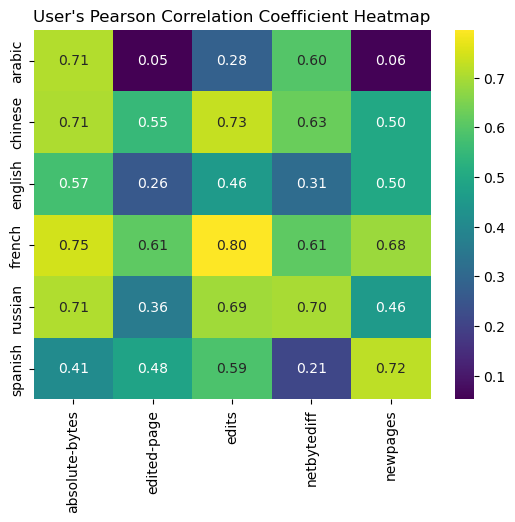

In [48]:
plot("pearson-cc-user")

['absolute-bytes', 'edited-page', 'edits', 'netbytediff', 'newpages']


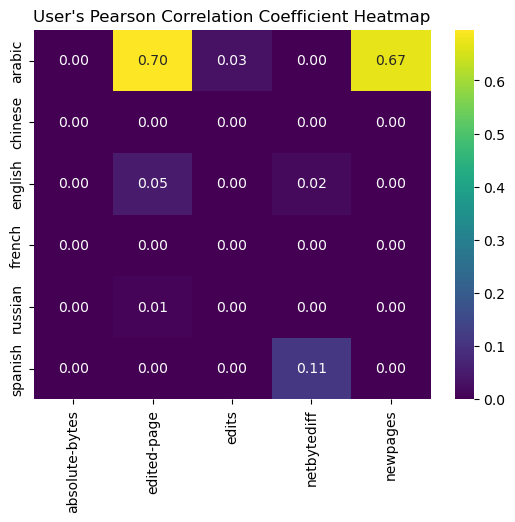

In [49]:
plot("pearson-p-user")

['absolute-bytes', 'edited-page', 'edits', 'netbytediff', 'newpages']


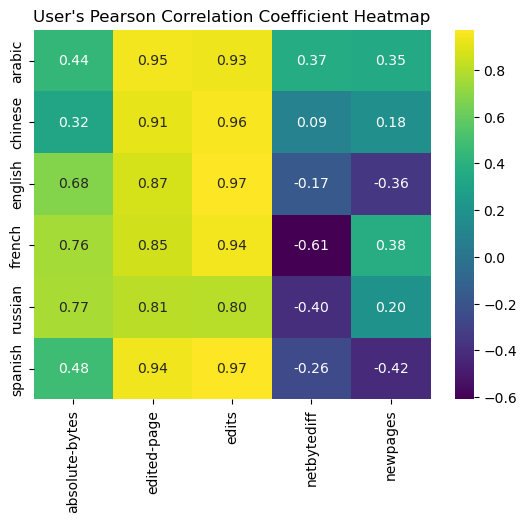

In [51]:
plot("pearson-cc-anon")

['absolute-bytes', 'edited-page', 'edits', 'netbytediff', 'newpages']


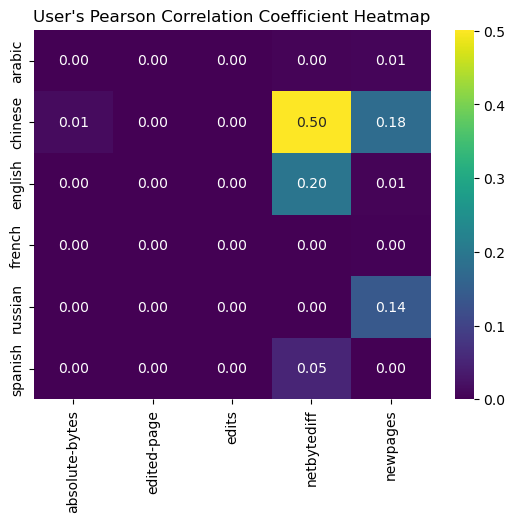

In [52]:
plot("pearson-p-anon")